# Exploratory Analysis

Notebook for exploring the dataset and model predictions.

In [6]:
import sys
sys.path.insert(0, "..")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style (larger fonts for readability)
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.1)
plt.rcParams["figure.figsize"] = (14, 7)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12


## Load Dataset

In [7]:
df = pd.read_csv("../data/processed/splits.csv")
print(f"Total samples: {len(df)}")
df.head()

Total samples: 11906


,protein_id,sequence,label,gram_type,partition,split
0,Q4FMX6,MADKTLNQIRTTFLDYFEKNDHKIVESSNLVPNNDPTLMFANSGMV...,Cytoplasmic,negative,1,train
1,Q8DIV4,MTTVLQRREQLNLWEQFCSWVTSTNNRLYVGWFGVLMIPTLLAATI...,CYtoplasmicMembrane,negative,0,train
2,P0ACV4,MKYLLIFLLVLAIFVISVTLGAQNDQQVTFNYLLAQGEYRISTLLA...,CYtoplasmicMembrane,negative,1,train
3,P33232,MIISAASDYRAAAQRILPPFLFHYMDGGAYSEYTLRRNVEDLSEVA...,CYtoplasmicMembrane,negative,3,train
4,Q92KW8,MATERYNPRDAEPRWQHQWEAGKVFETKNDDPRDKYYVLEMFPYPS...,Cytoplasmic,negative,2,train


## Class Distribution

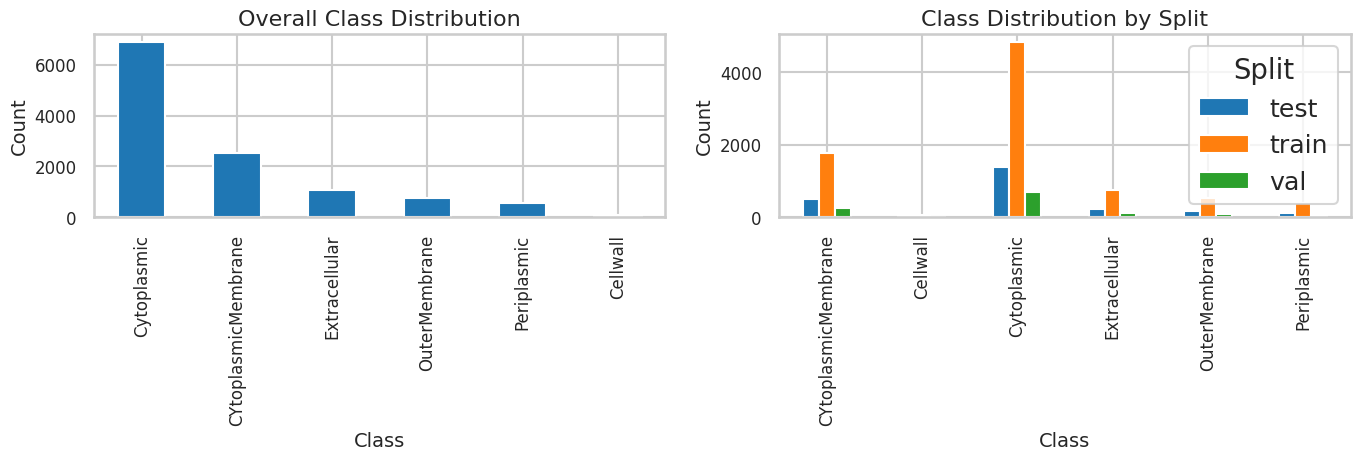

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall distribution
df["label"].value_counts().plot(kind="bar", ax=axes[0])
axes[0].set_title("Overall Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Per-split distribution
split_dist = df.groupby(["split", "label"]).size().unstack(fill_value=0)
split_dist.T.plot(kind="bar", ax=axes[1])
axes[1].set_title("Class Distribution by Split")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].legend(title="Split")

plt.tight_layout()
plt.show()

## Sequence Length Distribution

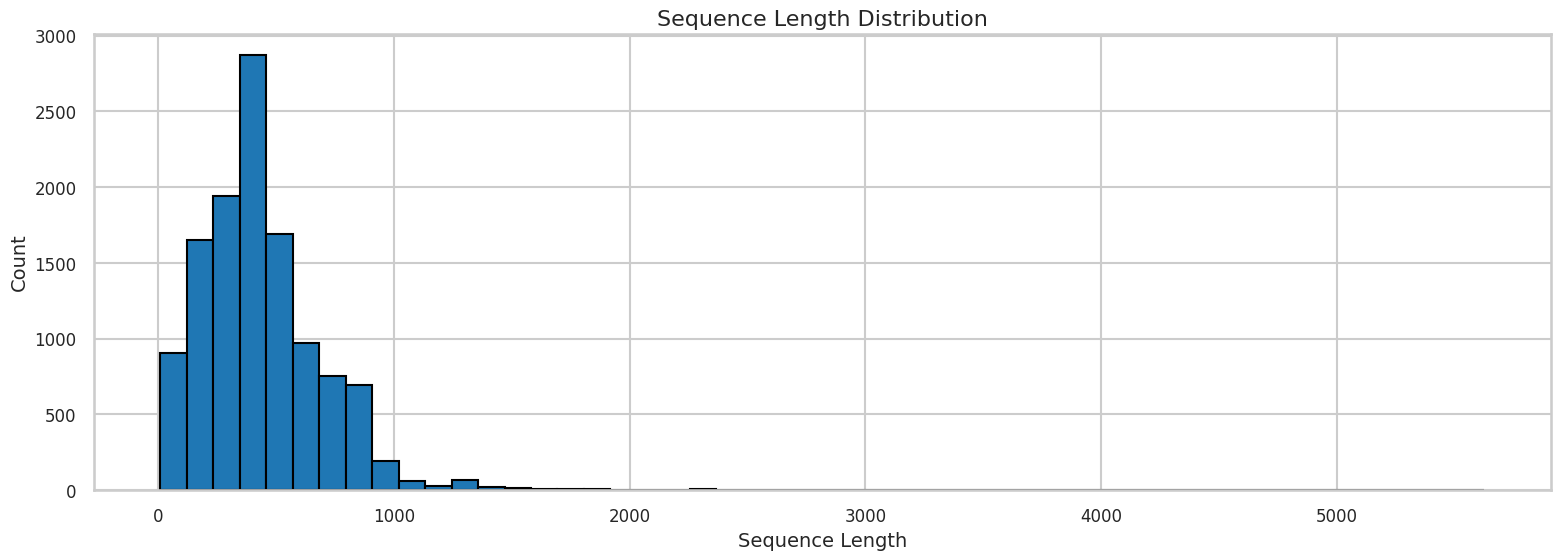

Mean length: 438.4
Median length: 399.0
Max length: 5627

Sequence with maximum length
Index: 5304
Length: 5627
Sequence (first 300 chars):
MDIRSPLNQCIALSLAGILFLNPIVAAAAGLALDKAAGGNTGLGQAGNGVPIVNIATPNGAGLSNNHFRDYNVGANGLILNNATGKTQGTQLGGIILGNPNLKGQAAQVILNQVTGGNRSTLAGYTEVAGQSARVIVANPHGITCQGCGFINTPRATLTTGKPIMDGQRLERFQVDGGDIVVEGAELNVGNLEQFDLITRSAKLNAKLYAKNLNIVTGRNDVQADSLQATPRAADGSEKPQLAIDSSALGGMYAGAIRLVGTEQGVGVKLAGDMAASGGDIRIDASGKLSLAQASSQGDL...


In [11]:
df["seq_length"] = df["sequence"].apply(len)

plt.figure(figsize=(16, 6))
plt.hist(df["seq_length"], bins=50, edgecolor="black")
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Sequence Length Distribution")
plt.tick_params(axis="both", labelsize=12)
plt.tight_layout()
plt.show()

# Statistiques globales
print(f"Mean length: {df['seq_length'].mean():.1f}")
print(f"Median length: {df['seq_length'].median():.1f}")
print(f"Max length: {df['seq_length'].max()}")

# Ligne correspondant à la séquence la plus longue
idx_max = df["seq_length"].idxmax()
max_row = df.loc[idx_max]

print("\nSequence with maximum length")
print(f"Index: {idx_max}")
print(f"Length: {max_row['seq_length']}")

# Affichage de la séquence (complet ou tronqué)
sequence = max_row["sequence"]
if len(sequence) > 300:
    print(f"Sequence (first 300 chars):\n{sequence[:300]}...")
else:
    print(f"Sequence:\n{sequence}")
